# Chapter 3 - Classification

# MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

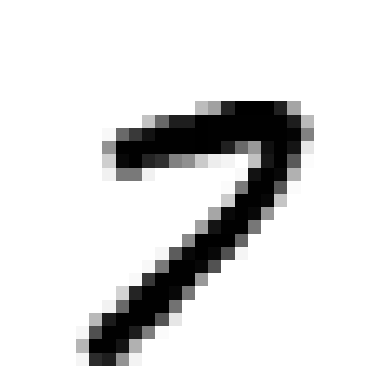

In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

some_digit = X[911]
plot_digit(some_digit)
plt.show()

In [4]:
y[911]

'7'

In [5]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

# Training a Binary Classifier

In [6]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [8]:
sgd_clf.predict([some_digit])

array([False])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.962 , 0.956 , 0.9665])

In [10]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict(X_train))

False

In [11]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.914 , 0.9145, 0.9145])

## Confusion Matrices

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[5375,  111],
       [ 120,  394]])

## Precision and Recall

$$
precision = \frac{TP}{TP + FP}
$$

$$
recall = \frac{TP}{TP + FN}
$$

* TP = true positives
* FP = false positives
* Fn = false negatives

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7801980198019802

F1 score

$$
    F_{1} = 2 \times \frac{precision \times recall}{precision + recall}
$$

In [15]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7733071638861629

## The Precision/Recall Trade-off

In [16]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-388965.51520792])

In [17]:
threshold = 0.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

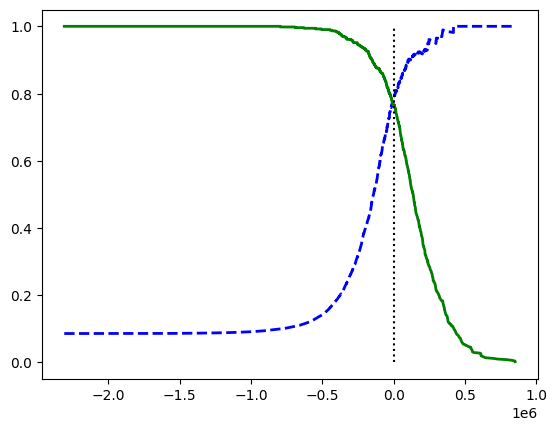

In [20]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

## The ROC Curve

# Multiclass Classification

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
svm_clf.predict([some_digit])

array(['7'], dtype=object)

In [23]:
some_digits_score = svm_clf.decision_function([some_digit])
some_digits_score.round(2)

array([[ 5.03,  0.71,  7.1 ,  3.98,  2.75,  6.06, -0.29,  9.31,  1.76,
         8.29]])

In [24]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [25]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [26]:
ovr_clf.predict([some_digit])

array(['7'], dtype='<U1')

In [27]:
len(ovr_clf.estimators_)

10

In [28]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [29]:
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

In [30]:
sgd_clf.decision_function([some_digit]).round()

array([[ -421035., -1177710.,  -425114.,  -441880.,  -538062.,  -388650.,
        -1218336.,   527462.,  -381405.,  -248114.]])

In [31]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8565, 0.8715, 0.8635])

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8705, 0.8985, 0.8925])

# Error Analysis

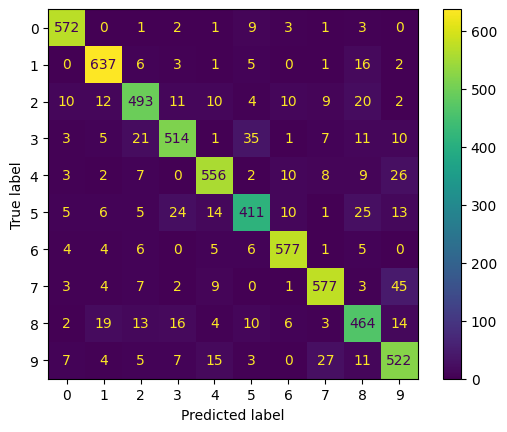

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

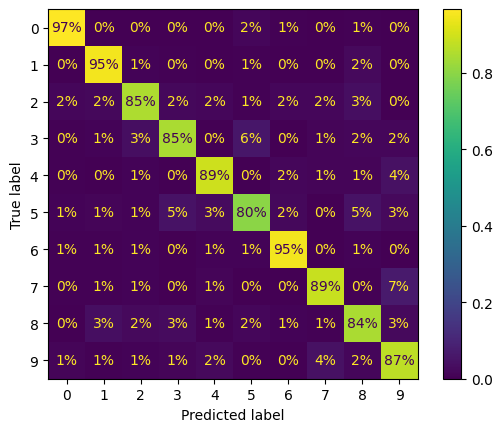

In [35]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
plt.show()

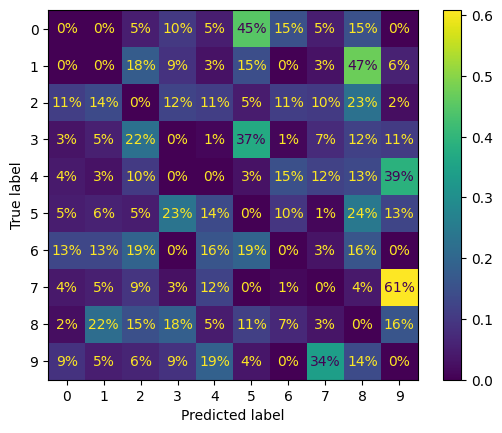

In [37]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%', sample_weight=sample_weight)
plt.show()

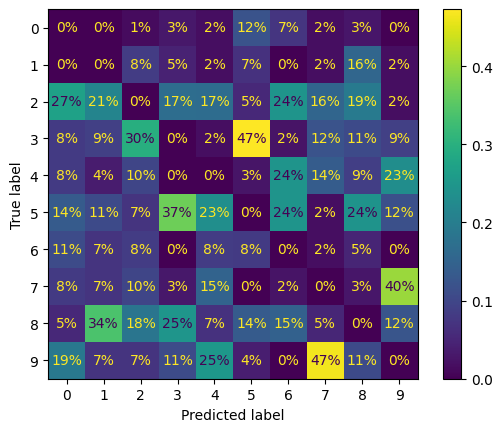

In [38]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='pred', values_format='.0%', sample_weight=sample_weight)
plt.show()

# Multilabel Classification

In [39]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [41]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9500922726736858

In [42]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [43]:
chain_clf.predict([some_digit])

array([[1., 1.]])

# Multioutput Classification